# Bottleneck distance

In [2]:
import numpy as np
import persim
#import persim.plot
import tadasets
from ripser import Rips
import matplotlib.pyplot as plt
import persim
import ripser

In [3]:
data_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
data_noisy = tadasets.dsphere(d=1, n=100, noise=0.1)

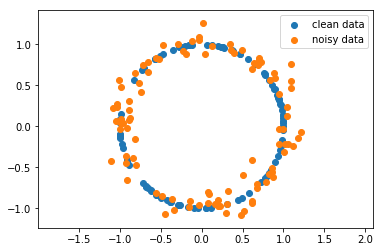

In [12]:
plt.scatter(data_clean[:,0], data_clean[:,1], label="clean data")
plt.scatter(data_noisy[:,0], data_noisy[:,1], label="noisy data")
plt.axis('equal')
plt.legend()
plt.show()

### Generate H1 diagrams for each of the data sets

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


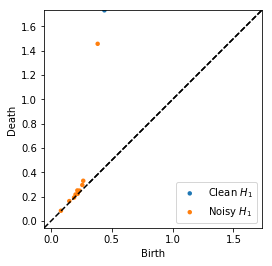

In [13]:
rips = Rips()
dgm_clean = rips.fit_transform(data_clean)[1]
dgm_noisy = rips.fit_transform(data_noisy)[1]
rips.plot(dgm_clean, labels = 'Clean $H_1$')
rips.plot(dgm_noisy, labels = 'Noisy $H_1$')

### Compute and visualize Bottleneck distance¶


In [24]:
dgm_clean = ripser.ripser(data_clean)['dgms'][1]
dgm_noisy = ripser.ripser(data_noisy)['dgms'][1]
distance_bottleneck, (matching, D) = persim.bottleneck(dgm_clean, dgm_noisy, matching=True)

In [25]:
persim.bottleneck(dgm_clean, dgm_noisy)

0.2752656936645508

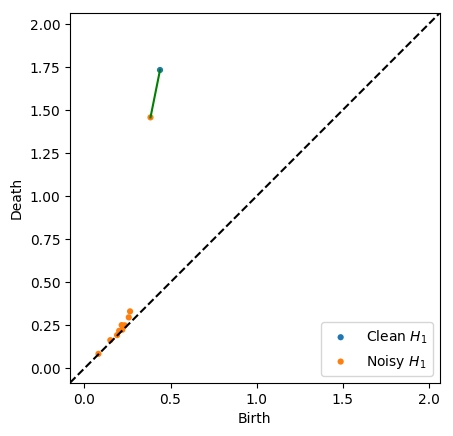

In [26]:
persim.bottleneck_matching(dgm_clean, dgm_noisy, matching, D, labels=['Clean $H_1$', 'Noisy $H_1$'])


### Various levels of noise


In this example, we will simulate various levels of noise and compute the distances from the clean circle

In [28]:
dists = []
noise_levels = np.linspace(0.0, 0.9, 30)
samples = 15

dists_bottleneck=[]
dists_sliced=[]

for n in noise_levels:
    for i in range(samples):
        ds_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
        dgm_clean = ripser.ripser(ds_clean)['dgms'][1]

        ds = tadasets.dsphere(d=1, n=100, noise=n)
        dgm = ripser.ripser(ds)['dgms'][1]

        dists_bottleneck.append((n, persim.bottleneck(dgm_clean, dgm)))
        #dists_sliced.append((n, persim.sliced_wasserstein(dgm_clean, dgm)))

#dists_sliced = np.array(dists_sliced)
dists_bottleneck = np.array(dists_bottleneck)

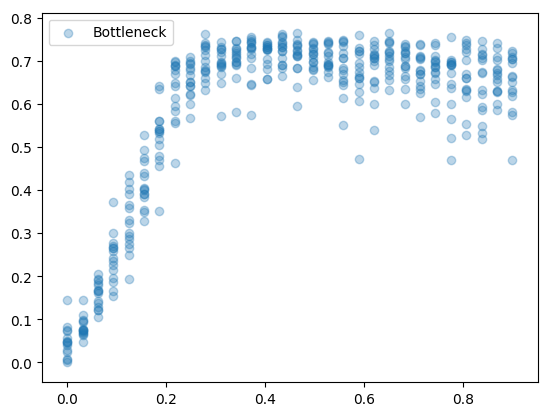

In [48]:
plt.scatter(dists_bottleneck[:,0], dists_bottleneck[:,1], label="Bottleneck", alpha=0.3)
#plt.scatter(dists_sliced[:,0], dists_sliced[:,1], label="Sliced Wasserstein", alpha=0.3)
plt.legend()

In [1]:
fig = plt.figure(figsize = (10,10))

for i, n in enumerate([0.0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8]):
    plt.subplot(331+i)

    ds_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
    ds = tadasets.dsphere(d=1, n=100, noise=n)
    
    plt.scatter(ds_clean[:,0], ds_clean[:,1], label="clean data")
    plt.scatter(ds[:,0], ds[:,1], label="noisy data")
    plt.axis('equal')
    plt.legend()
    plt.title("Noise:{}".format(n))
    

plt.tight_layout()

NameError: name 'plt' is not defined

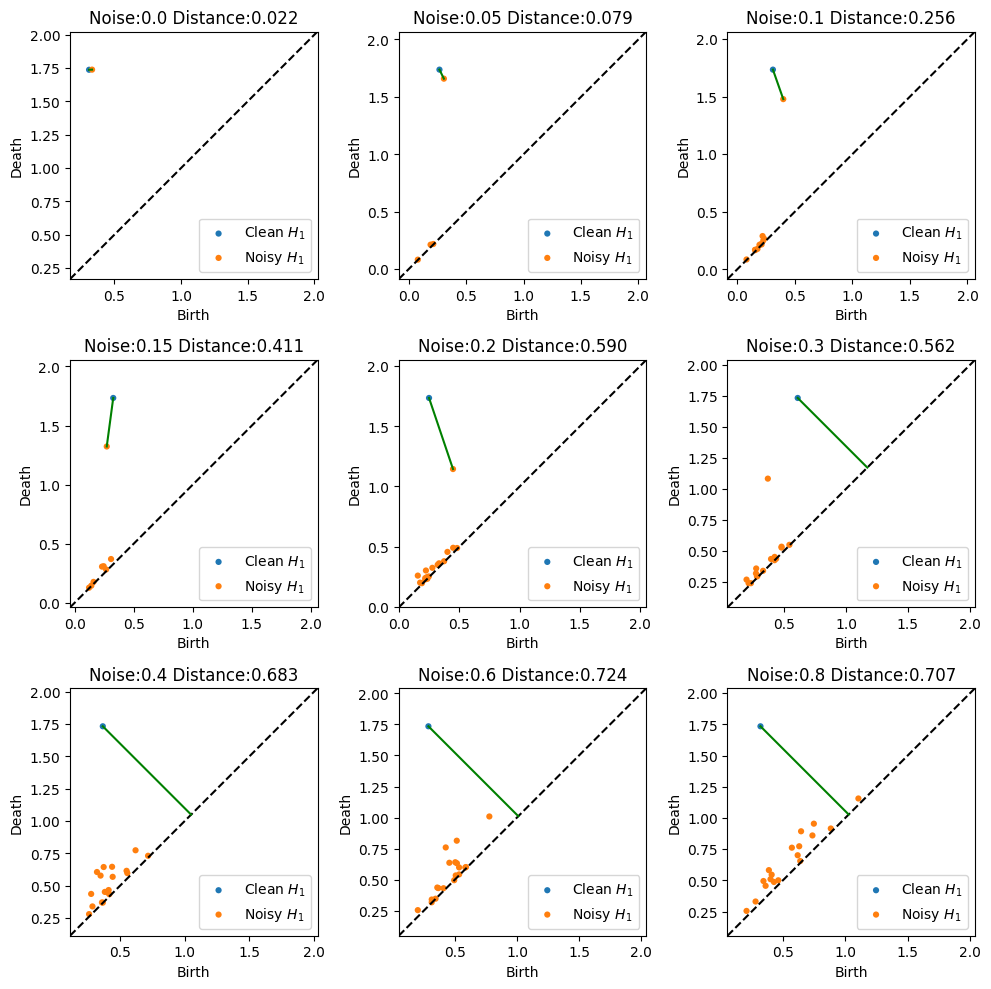

In [44]:
fig = plt.figure(figsize = (10,10))

for i, n in enumerate([0.0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8]):
    plt.subplot(331+i)

    ds_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
    dgm_clean = ripser.ripser(ds_clean)['dgms'][1]

    ds = tadasets.dsphere(d=1, n=100, noise=n)
    dgm = ripser.ripser(ds)['dgms'][1]
    
    #plt.scatter(ds_clean[:,0], ds_clean[:,1], label="clean data")
    #plt.scatter(ds[:,0], ds[:,1], label="noisy data")
    #plt.axis('equal')
    #plt.legend()
    
    d, (matching, D) = persim.bottleneck(
        dgm_clean,
        dgm,
        matching=True
    )

    persim.bottleneck_matching(dgm_clean, dgm, matching, D, labels=['Clean $H_1$', 'Noisy $H_1$'])

    plt.title("Noise:{} Distance:{:.3f}".format(n, d))

plt.tight_layout()